# Исследование надежности заемщиков

**Цель исследования:** провести исследовательский анализ платёжеспособности клиентов.

**Инструменты:** создание функций, сводных таблиц, категоризация данных, столбчатые диаграммы.

**Библиотеки:** matplotlib, seaborn

## Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Описание данных
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1 Общая информация

In [2]:
try:
    data = pd.read_csv('/Users/aniaprokosheva/projects/datasets/clients_bank.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.538908,1.381587,-1.000000,0.000000,0.000000,1.000000,2.000000e+01
days_employed,19351.0,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,4.017554e+05
dob_years,21525.0,43.293380,12.574584,0.000000,33.000000,42.000000,53.000000,7.500000e+01
education_id,21525.0,0.817236,0.548138,0.000000,1.000000,1.000000,1.000000,4.000000e+00
family_status_id,21525.0,0.972544,1.420324,0.000000,0.000000,0.000000,1.000000,4.000000e+00
debt,21525.0,0.080883,0.272661,0.000000,0.000000,0.000000,0.000000,1.000000e+00
total_income,19351.0,167422.302208,102971.566448,20667.263793,103053.152913,145017.937533,203435.067663,2.265604e+06


**Вывод:** Наблюдаются аномалии в столбцах `days_employed`, `children`. Столбцы `days_employed` и `total_income` содержат пропуски - нужно их обработать. Типы данных в принципе правильные, можно их поменять для уменьшение общей памяти.

## 2 Предобработка данных

### 2.1 Обработка аномальных значений

Замечены артефакты в столбце `days_employed` - отрицательное количество дней трудового стажа. Обработаем. 

In [5]:
# замена отрицательного количества дней трудового стажа
data['days_employed'] = data['days_employed'].abs()

In [6]:
# перечень уникальных значений столбца children
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [7]:
# удалим аномальные значения
data = data[(data['children'] != -1) & (data['children'] != 20)]

# проверка
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

**Аномалии убрали.**

### 2.2 Удаление пропусков

In [8]:
# пропуски
data.isna().sum()

children               0
days_employed       2162
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2162
purpose                0
dtype: int64

`total_income` хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски можно медианным значением по каждому типу из столбца `income_type`.

In [9]:
# заполнение пропусков в total_income
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

In [10]:
# заполнение пропусков в days_employed 
# медианными значениями по каждому типу занятости income_type
for t in data['income_type'].unique():
        data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
        data.loc[(data['income_type'] == t), 'days_employed'].median()

In [11]:
# проверка
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Пропусков в обработанном датасете нет.**
* Пропуски могут быть случайными, например, человеческий фактор - случайно не записали данные. 
* И пропуски могут быть неслучайными, например, не существует данных по этой характеристике. 

### 2.3 Изменение типов данных

In [12]:
data['days_employed'] = data['days_employed'].astype('int32')
data['total_income'] = data['total_income'].astype('int32')
data['children'] = data['children'].astype('int8')
data['dob_years'] = data['dob_years'].astype('int8')
data['education_id'] = data['education_id'].astype('int8')
data['family_status_id'] = data['family_status_id'].astype('int8')
data['debt'] = data['debt'].astype('int8')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21402 non-null  int8  
 1   days_employed     21402 non-null  int32 
 2   dob_years         21402 non-null  int8  
 3   education         21402 non-null  object
 4   education_id      21402 non-null  int8  
 5   family_status     21402 non-null  object
 6   family_status_id  21402 non-null  int8  
 7   gender            21402 non-null  object
 8   income_type       21402 non-null  object
 9   debt              21402 non-null  int8  
 10  total_income      21402 non-null  int32 
 11  purpose           21402 non-null  object
dtypes: int32(2), int8(5), object(5)
memory usage: 1.2+ MB


**Изменив тип данных, общая память уменьшилась с 2.0+ МВ до 1.2+ МВ.**

### 2.4 Обработка дубликатов

In [13]:
# уникальные значения в столбце education 
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [14]:
# приведем к нижнему регистру
data['education'] = data['education'].str.lower()

In [15]:
# дубликаты
data.duplicated().sum()

71

In [16]:
# удалим дубликаты
data = data.drop_duplicates()

### 2.5 Категоризация данных

#### 2.5.1 Категории по ежемесячному доходу

Столбец `total_income_category` с категориями:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

In [17]:
# функция для создания категорий по ежемесячному доходу
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

#### 2.5.2 Категории в зависимости от целей взятия кредита

In [19]:
# перечень уникальных целей взятия кредита из столбца purpose
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Столбец `purpose_category` с категориями:
- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'.

In [20]:
# функция для создания категорий в зависимости от целей взятия кредита
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## 3 Исследовательский анализ

### 3.1 Зависимость между количеством детей и возвратом кредита в срок

In [22]:
# объединим семьи с более 2 детьми, так как в датасете их мало
data.loc[data['children'] > 2, 'children'] = 'other'

children_grouped = data.pivot_table(index = ['children'], values = 'debt', aggfunc = ['count', 'sum'])
children_grouped.columns = ['total', 'debt']
children_grouped['%'] = children_grouped['debt']/children_grouped['total']
children_grouped.style.format({'%': '{:.2%}'})

,total,debt,%
children,,,
0,14091,1063,7.54%
1,4808,444,9.23%
2,2052,194,9.45%
other,380,31,8.16%


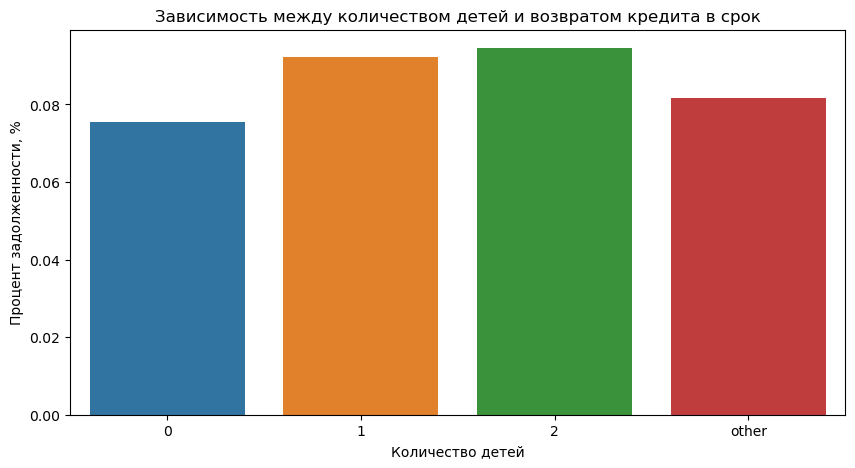

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x=children_grouped.index, y=children_grouped['%'])
plt.xlabel('Количество детей')
plt.ylabel('Процент задолженности, %')
plt.title('Зависимость между количеством детей и возвратом кредита в срок')
plt.show()

**Вывод:** Процент задолженности по возврату кредитов зависит от количества детей в семье. Прослеживается общая тенденция: чем больше детей, тем чаще задолженность. Наименьшее количество задолжностей у семей без детей.

### 3.2 Зависимость между семейным положением и возвратом кредита в срок

In [24]:
family_status_grouped = data.pivot_table(index = ['family_status'], values = 'debt', aggfunc = ['count', 'sum'])
family_status_grouped.columns = ['total', 'debt']
family_status_grouped['%'] = family_status_grouped['debt']/family_status_grouped['total']
family_status_grouped = family_status_grouped.sort_values(by = ['%'], ascending = False)
family_status_grouped.style.format({'%': '{:.2%}'})

,total,debt,%
family_status,,,
Не женат / не замужем,2796,273,9.76%
гражданский брак,4134,385,9.31%
женат / замужем,12261,927,7.56%
в разводе,1189,84,7.06%
вдовец / вдова,951,63,6.62%


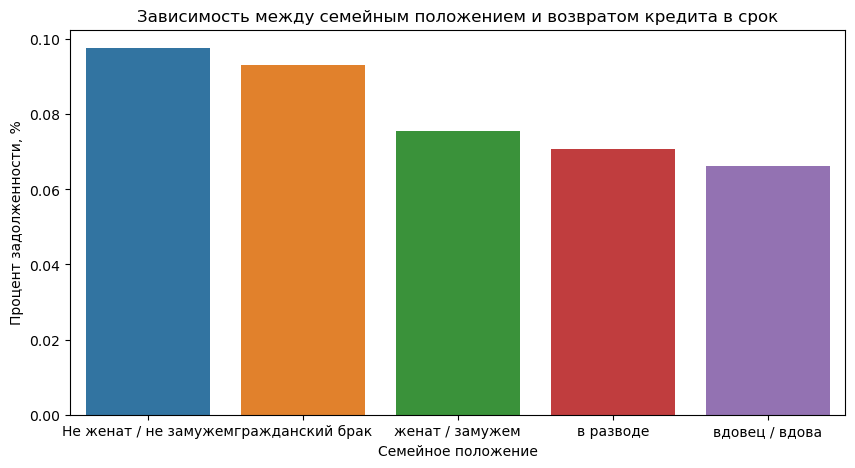

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x=family_status_grouped.index, y=family_status_grouped['%'])
plt.xlabel('Семейное положение')
plt.ylabel('Процент задолженности, %')
plt.title('Зависимость между семейным положением и возвратом кредита в срок')
plt.show()

**Вывод:** Процент задолженности по возврату кредитов зависит от семейного положения. Прослеживается общая тенденция: при задокументированном браке процент задолженности меньше.
- больше всего задолжностей у людей не женатых/не замужем.
- люди после брака (в равзоде или вдовец/вдова) имеют низкий процент задолжности

### 3.3 Зависимость между уровнем дохода и возвратом кредита в срок

In [26]:
total_income_category_grouped = data.pivot_table(index = ['total_income_category'], values = 'debt', aggfunc = ['count', 'sum'])
total_income_category_grouped.columns = ['total', 'debt']
total_income_category_grouped['%'] = total_income_category_grouped['debt']/total_income_category_grouped['total']
total_income_category_grouped.style.format({'%': '{:.2%}'})

,total,debt,%
total_income_category,,,
A,25,2,8.00%
B,5014,354,7.06%
C,15921,1353,8.50%
D,349,21,6.02%
E,22,2,9.09%


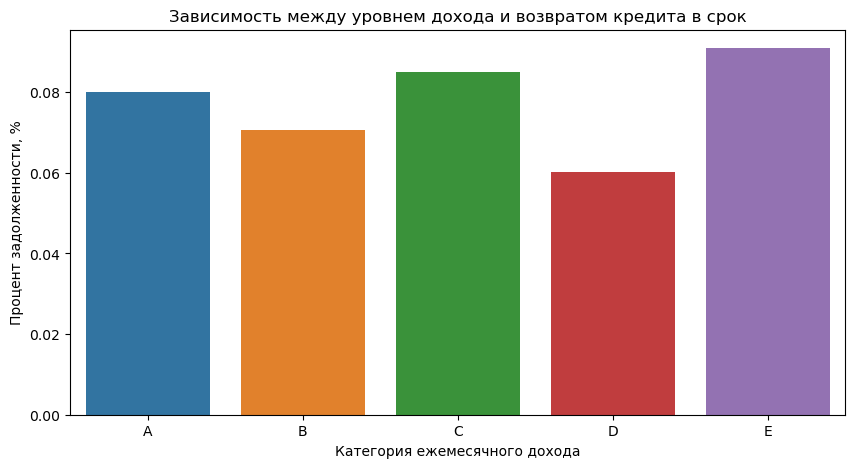

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x=total_income_category_grouped.index, y=total_income_category_grouped['%'])
plt.xlabel('Категория ежемесячного дохода')
plt.ylabel('Процент задолженности, %')
plt.title('Зависимость между уровнем дохода и возвратом кредита в срок')
plt.show()

**Вывод:** Общая динамика по задолжностям и уровнем дохода не прослеживается. 
* У категории А и Е маленькая выборка, которая может искажать выходные данные.

### 3.4 Влияние целей кредита на его возврат в срок

In [28]:
purpose_category_grouped = data.groupby('purpose_category').agg({'debt': ['count', 'sum']})
purpose_category_grouped['%'] = purpose_category_grouped['debt']['sum']/purpose_category_grouped['debt']['count']
purpose_category_grouped= round(purpose_category_grouped.sort_values(by = '%')*100,2)
purpose_category_grouped

debt            %
                            count    sum      
purpose_category                              
операции с недвижимостью  1075100  78000  7.26
проведение свадьбы         231300  18300  7.91
получение образования      398800  36900  9.25
операции с автомобилем     427900  40000  9.35

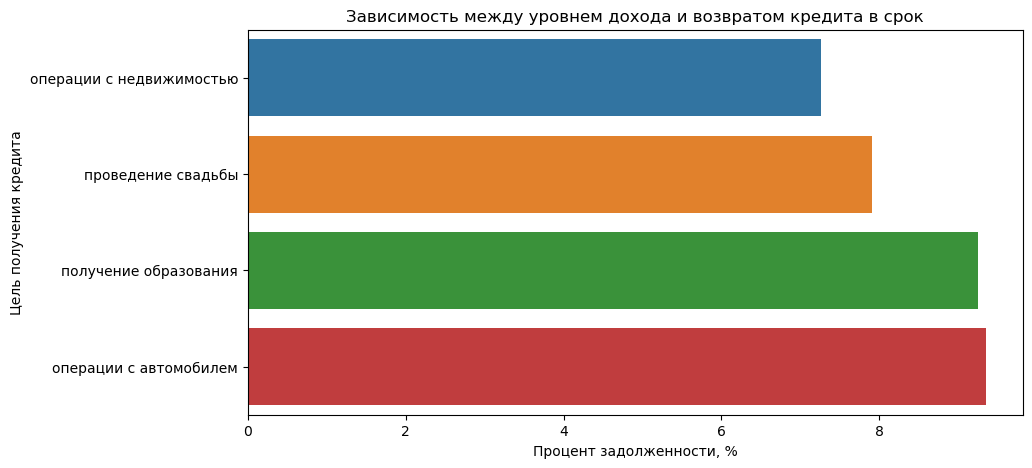

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x=purpose_category_grouped['%'], y=purpose_category_grouped.index)
plt.xlabel('Процент задолженности, %')
plt.ylabel('Цель получения кредита')
plt.title('Зависимость между уровнем дохода и возвратом кредита в срок')
plt.show()

**Вывод:** Причины возникновения задолжностей в зависимости от цели получения кредита не ясны. Меньше всего задолжностей при операциях с недвижимостью, больше всего - операции с автомобилем.

## 4 Выводы
Полученные данные были проанализированы. Выяснилось, что **при выдаче кредита необходимо обращать внимание на количество детей в семье и на семейное положение.**
* У семей без детей процент задолжностей - 7.54%, когда семьи с 2 детьми имеют процент задолжности - 9.45%. 
* При задокументированном браке процент задолженности меньше. У человека в браке процент задолжности составляет 7.56%, у не женатого/ не замужнего человека - 9.76%.